## Logestic Regression -  Financial Fraud Transactions

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
model_df = pd.read_csv("/Users/sa17/Desktop/financial-fraud/financial-fraud-analysis/data/processed/cleanlog.csv")

model_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,181.00,181.00,0.00,0.00,0.00,1,0,0,0,1
3,181.00,181.00,0.00,21182.00,0.00,1,1,0,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
6264735,339682.13,339682.13,0.00,0.00,339682.13,1,1,0,0,0
6264736,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,1
6264737,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,1,0,0,0
6264738,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,1


In [5]:
# Declare feature vector and target variable 
X = model_df.drop(["isFraud"], axis=1)

y = model_df["isFraud"]

In [6]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5011792, 9), (1252948, 9))

In [8]:
# Train Logistic Regression Model default value of C = 1.
lr = LogisticRegression(max_iter=10000, random_state=42, solver="liblinear")
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42, solver='liblinear')

In [9]:
# Prediction Model
y_pred_test = lr.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.

0 is for probability of no fraud  and 1 is for probability of fraud.

In [10]:
# Probability of getting output as 0 - no fraud
lr.predict_proba(X_test)[:,0]

array([1.      , 0.752927, 1.      , ..., 1.      , 1.      , 1.      ])

In [11]:
# Probability of getting output as 1 - fraud
lr.predict_proba(X_test)[:,1]

array([1.01069366e-024, 2.47073004e-001, 1.11443646e-237, ...,
       0.00000000e+000, 5.18966204e-120, 0.00000000e+000])

Here, y_test are the true class labels and y_pred_test are the predicted class labels in the test-set.

In [12]:
print("Model Accuracy Score: {0:0.4f}". format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9989


compare the train-set and test-set accuracy to check for overfitting.

In [13]:
y_pred_train = lr.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
print("Training set score: {:.4f}".format(lr.score(X_train, y_train)))

print("Test set score: {:.4f}".format(lr.score(X_test, y_test)))

Training set score: 0.9988
Test set score: 0.9989


In [53]:
print("\nInitial Classification Report:")
print(classification_report(y_test, y_pred_test))


Initial Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1251289
           1       0.55      0.78      0.64      1659

    accuracy                           1.00   1252948
   macro avg       0.77      0.89      0.82   1252948
weighted avg       1.00      1.00      1.00   1252948



In Logistic Regression, we use default value of C = 1. It provides good performance with approximately 85% accuracy on both the training and the test set. Let's see what happens if we change the parameters.

In [76]:
# Hyperparameter Tuning with RandomizedSearchCV  
param_dist = {"C": [0.1, 0.3, 0.5, 0.7, 0.9, 1]} # Logestic Regression between 0 and 1 

random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_dist,
    n_iter=6,  # default=10 Number of parameter settings that are sampled. changed to 6 since there only 6 paramaters
    scoring="accuracy",
    cv=5, # default 5 - cross validation
    random_state=42,
    n_jobs=-1, # -1 means using all processors
    verbose=2 # >1 : the computation time for each fold and parameter candidate is displayed
)

random_search.fit(X_train, y_train)

print("\nBest Parameters from RandomizedSearchCV:")
print(random_search.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..............................................C=0.1; total time= 1.2min
[CV] END ..............................................C=0.3; total time= 1.3min
[CV] END ..............................................C=0.1; total time= 1.9min
[CV] END ..............................................C=0.3; total time= 2.1min
[CV] END ..............................................C=0.1; total time= 2.1min
[CV] END ..............................................C=0.1; total time= 2.3min
[CV] END ..............................................C=0.1; total time= 2.4min
[CV] END ..............................................C=0.3; total time= 1.3min
[CV] END ..............................................C=0.5; total time=  31.8s
[CV] END ..............................................C=0.3; total time= 2.8min
[CV] END ..............................................C=0.3; total time= 1.6min
[CV] END ........................................

In [17]:
# Retrain Logistic Regression model with the best hyperparameter
best_lr = LogisticRegression(C=0.5, max_iter=10000, random_state=42, solver="liblinear")
best_lr.fit(X_train, y_train)

LogisticRegression(C=0.5, max_iter=10000, random_state=42, solver='liblinear')

In [18]:
# Predict on the test set
best_y_pred = best_lr.predict(X_test)

best_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
# Evaluate the model
accuracy = accuracy_score(y_test, best_y_pred)
print(f"Optimized Model Accuracy Score: {accuracy:.4f}")

Optimized Model Accuracy Score: 0.9979


In [55]:
# Print classification report
print("\nOpitimized Classification Report:")
print(classification_report(y_test, best_y_pred))


Opitimized Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1251289
           1       0.36      0.79      0.50      1659

    accuracy                           1.00   1252948
   macro avg       0.68      0.90      0.75   1252948
weighted avg       1.00      1.00      1.00   1252948



ROC Curve for Best Line

In [24]:
# Calculate the False Positive Rate, True Positive Rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, best_lr.predict_proba(X_test)[:, 1])

In [25]:
# Calculate Youden's J statistic to find the best threshiold
youden_j = tpr - fpr
best_threshold_index = youden_j.argmax()
best_threshold = thresholds[best_threshold_index]

print(f"Best Threshold: {best_threshold:.4f}")

# Calculate the Area under curve 
roc_auc = auc(fpr,tpr)
print(f"Area Under Curve: {roc_auc}")

Best Threshold: 0.3390
Area Under Curve: 0.9605098633982428


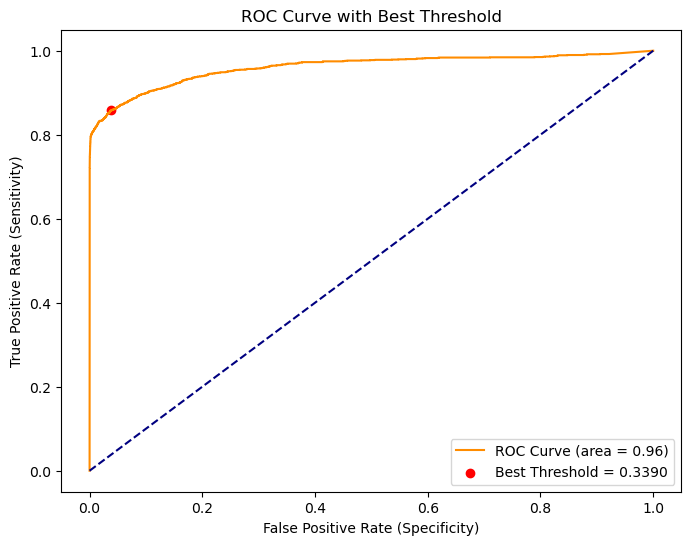

In [26]:
# Plot ROC Curve with the best threshold marked
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange",label="ROC Curve (area = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="navy" , linestyle="--")
plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index], color="red", label=f"Best Threshold = {best_threshold:.4f}")
plt.xlabel("False Positive Rate (Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve with Best Threshold")
plt.legend(loc="lower right")
plt.show()

Confusion Matrix

In [46]:
y_pred_threshold = (best_y_pred >= best_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred_threshold)

print("Confusion matrix\n\n", cm)

print("\nTrue Positives(TP) = ", cm[0,0])

print("\nTrue Negatives(TN) = ", cm[1,1])

print("\nFalse Positives(FP) = ", cm[0,1])

print("\nFalse Negatives(FN) = ", cm[1,0])

Confusion matrix

 [[1248978    2311]
 [    344    1315]]

True Positives(TP) =  1248978

True Negatives(TN) =  1315

False Positives(FP) =  2311

False Negatives(FN) =  344


The confusion matrix shows 1248978 + 1315 = 1250293 correct predictions and 2311 + 344 = 2655 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 1248978

True Negatives (Actual Negative:0 and Predict Negative:0) - 1315

False Positives (Actual Negative:0 but Predict Positive:1) - 2311 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 2655 (Type II error)

<Axes: >

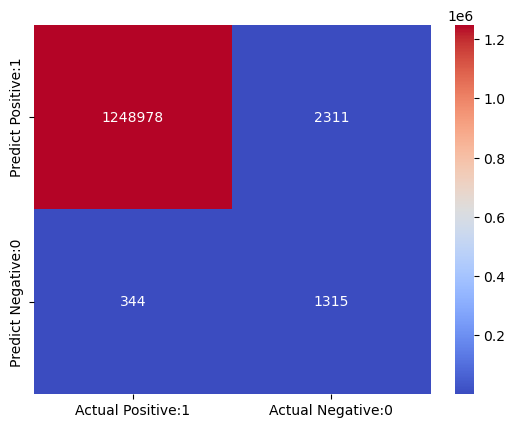

In [47]:
cm_matrix = pd.DataFrame(data=cm, columns=["Actual Positive:1", "Actual Negative:0"], 
                                 index=["Predict Positive:1", "Predict Negative:0"])

sns.heatmap(cm_matrix, annot=True, fmt="d", cmap="coolwarm")

In [32]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [49]:
# Accuracy on confusion matrix with best threshold

cm_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print("Optimized Model 2 Accuracy Score: {0:0.4f}".format(cm_accuracy))

Optimized Model 2 Accuracy Score: 0.9979


In [57]:
# Classification report on best threshhold
print("\nOpitimized 2 Classification Report:")
print(classification_report(y_test, y_pred_threshold))


Opitimized 2 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1251289
           1       0.36      0.79      0.50      1659

    accuracy                           1.00   1252948
   macro avg       0.68      0.90      0.75   1252948
weighted avg       1.00      1.00      1.00   1252948



Compare initial, best parameter and best threshold for the model

In [51]:
print("Initial Model Accuracy Score: {0:0.4f}". format(accuracy_score(y_test, y_pred_test)))
print(f"Optimized Model Accuracy Score: {accuracy:.4f}") # best hyperparameter
print("0ptimized Model 2 Accuracy Score : {0:0.4f}".format(cm_accuracy)) #best threshold

Initial Model Accuracy Score: 0.9989
Optimized Model Accuracy Score: 0.9979
0ptimized Model 2 Accuracy Score : 0.9979


In [58]:
print("\nInitial Classification Report:")
print(classification_report(y_test, y_pred_test))

print("\nOpitimized Classification Report:")
print(classification_report(y_test, best_y_pred))

print("\nOpitimized 2 Classification Report:")
print(classification_report(y_test, y_pred_threshold))


Initial Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1251289
           1       0.55      0.78      0.64      1659

    accuracy                           1.00   1252948
   macro avg       0.77      0.89      0.82   1252948
weighted avg       1.00      1.00      1.00   1252948


Opitimized Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1251289
           1       0.36      0.79      0.50      1659

    accuracy                           1.00   1252948
   macro avg       0.68      0.90      0.75   1252948
weighted avg       1.00      1.00      1.00   1252948


Opitimized 2 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1251289
           1       0.36      0.79      0.50      1659

    accuracy                           1.00   1252948
   macro avg       0.68 

In [61]:
print("\nInitial F1 Score:")
print(f1_score(y_test, y_pred_test))

print("\nOpitimized F1 Score:")
print(f1_score(y_test, best_y_pred))

print("\nOpitimized 2 F1 Score:")
print(f1_score(y_test, y_pred_threshold))


Initial F1 Score:
0.6435520079820404

Opitimized F1 Score:
0.49763481551561023

Opitimized 2 F1 Score:
0.49763481551561023
